In [1]:
import statsmodels.api as sm
import scipy.stats as stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [7]:
pickle = pd.read_pickle('game_log_list.pickle')
df = pd.DataFrame(pickle, columns=pickle[0].keys())

In [8]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

df.date_game = pd.to_datetime(df.date_game)

In [11]:
df = df[df.date_game.isna()==False]

In [17]:
df['ftsy_pts']=(df.pts*1)+(df.trb*1.2)+(df.ast*1.5)+(df.blk*3)+(df.stl*3)-(df.tov)

In [18]:
harden = df[df.player=='James Harden']
harden.set_index('date_game', inplace=True)

In [63]:
harden

,player_id,player,game_season,age,team_id,game_location,opp_id,game_result,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus,ftsy_pts
date_game,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-17,hardeja01,James Harden,1.0,29-052,HOU,,NOP,L (-19),1.0,34:43,6.0,15.0,0.400,3.0,8.0,0.375,3.0,4.0,0.750,2.0,7.0,9.0,10.0,3.0,1.0,4.0,2.0,18.0,18.9,-23.0,51.8
2018-10-20,hardeja01,James Harden,2.0,29-055,HOU,@,LAL,W (+9),1.0,37:50,10.0,19.0,0.526,5.0,10.0,0.500,11.0,15.0,0.733,1.0,6.0,7.0,5.0,2.0,1.0,6.0,2.0,36.0,27.0,-3.0,54.9
2018-10-21,hardeja01,James Harden,3.0,29-056,HOU,@,LAC,L (-3),1.0,39:45,11.0,26.0,0.423,4.0,12.0,0.333,5.0,6.0,0.833,0.0,4.0,4.0,14.0,2.0,0.0,3.0,1.0,31.0,26.4,5.0,59.8
2018-10-24,hardeja01,James Harden,4.0,29-059,HOU,,UTA,L (-11),1.0,31:38,10.0,19.0,0.526,3.0,4.0,0.750,6.0,9.0,0.667,1.0,4.0,5.0,7.0,1.0,0.0,7.0,4.0,29.0,17.7,-5.0,41.5
2018-10-26,hardeja01,James Harden,NaN,29-061,HOU,,LAC,L (-20),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30,hardeja01,James Harden,NaN,29-065,HOU,,POR,L (-19),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,hardeja01,James Harden,NaN,29-068,HOU,@,BRK,W (+8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-03,hardeja01,James Harden,5.0,29-069,HOU,@,CHI,W (+8),1.0,33:16,7.0,17.0,0.412,5.0,12.0,0.417,6.0,8.0,0.750,0.0,1.0,1.0,7.0,4.0,0.0,8.0,3.0,25.0,15.1,9.0,40.7
2018-11-05,hardeja01,James Harden,6.0,29-071,HOU,@,IND,W (+4),1.0,35:07,7.0,15.0,0.467,5.0,12.0,0.417,9.0,9.0,1.000,0.0,4.0,4.0,6.0,3.0,1.0,5.0,5.0,28.0,22.4,6.0,48.8


In [90]:
harden[['ftsy_pts']].resample('w').mean()

,ftsy_pts
date_game,
2018-10-21,55.500000
2018-10-28,41.500000
2018-11-04,40.700000
2018-11-11,48.625000
2018-11-18,48.800000
2018-11-25,57.533333
2018-12-02,62.225000
2018-12-09,39.933333
2018-12-16,59.366667


In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [40]:
train = harden[:60]
test = harden[60:]

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

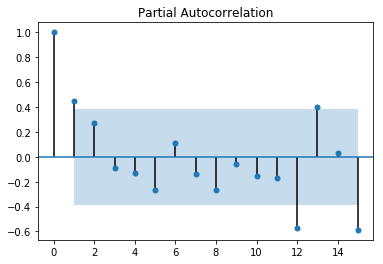

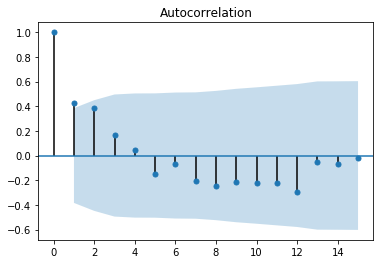

In [87]:
plot_pacf(harden[['ftsy_pts']].resample('1w').mean(), lags=15), plot_acf(harden[['ftsy_pts']].resample('1w').mean(), lags=15)

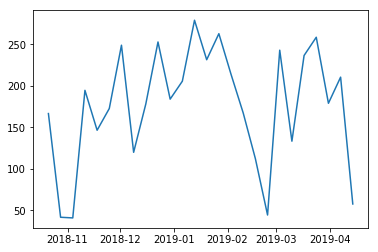

In [88]:
plt.plot(harden[['ftsy_pts']].resample('w').sum())

In [97]:
poop = pd.read_pickle('game_log_history.pickle')

In [96]:
names = df.groupby('player_id').max()[['player']]

In [99]:
poop = poop.merge(names, left_on='pid', right_index=True)

In [116]:
poop = poop[poop.Date != 'Date']

In [118]:
poop.Date = pd.to_datetime(poop.Date, format='%Y-%m-%d')

In [124]:
poop[poop.pid == 'abrinal01']

,+/-,3P,3P%,3PA,AST,Age,BLK,DRB,Date,FG,FG%,FGA,FT,FT%,FTA,G,GS,GmSc,MP,ORB,Opp,PF,PTS,Rk,STL,TOV,TRB,Tm,Unnamed: 29,Unnamed: 30,Unnamed: 5,Unnamed: 7,pid,player
0,+3,1,1.000,1,0,23-086,0,1,2016-10-26,1,.500,2,0,NaN,0,1,0,-0.9,13:24,0,PHI,3,3,1,0,2,1,OKC,NaN,NaN,@,W (+6),abrinal01,Álex Abrines
1,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,23-088,Did Not Play,Did Not Play,2016-10-28,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,NaN,Did Not Play,Did Not Play,Did Not Play,Did Not Play,PHO,Did Not Play,Did Not Play,2,Did Not Play,Did Not Play,Did Not Play,OKC,NaN,NaN,NaN,W (+3),abrinal01,Álex Abrines
2,0,0,NaN,0,0,23-090,0,0,2016-10-30,1,1.000,1,3,1.000,3,2,0,5.7,1:49,0,LAL,0,5,3,1,0,0,OKC,NaN,NaN,NaN,W (+17),abrinal01,Álex Abrines
3,+4,2,1.000,2,0,23-093,0,0,2016-11-02,2,1.000,2,0,NaN,0,3,0,3.4,7:54,0,LAC,0,6,4,0,2,0,OKC,NaN,NaN,@,W (+2),abrinal01,Álex Abrines
4,-13,1,.167,6,1,23-094,0,2,2016-11-03,1,.167,6,2,1.000,2,4,0,3.2,19:20,1,GSW,0,5,5,0,0,3,OKC,NaN,NaN,@,L (-26),abrinal01,Álex Abrines
5,-4,0,NaN,0,2,23-096,0,2,2016-11-05,0,.000,1,1,1.000,1,5,0,2.9,17:16,0,MIN,1,1,6,1,0,2,OKC,NaN,NaN,NaN,W (+20),abrinal01,Álex Abrines
6,-4,1,.143,7,0,23-098,0,1,2016-11-07,2,.222,9,0,NaN,0,6,0,-1.3,16:59,1,MIA,2,5,7,1,2,2,OKC,NaN,NaN,NaN,W (+12),abrinal01,Álex Abrines
7,-3,1,1.000,1,0,23-100,0,0,2016-11-09,1,1.000,1,0,NaN,0,7,0,1.7,4:50,0,TOR,0,3,8,0,1,0,OKC,NaN,NaN,NaN,L (-10),abrinal01,Álex Abrines
8,+6,0,.000,1,0,23-102,0,1,2016-11-11,1,.500,2,1,.500,2,8,0,0.1,12:56,0,LAC,2,3,9,0,1,1,OKC,NaN,NaN,NaN,L (-2),abrinal01,Álex Abrines
9,-2,1,.250,4,0,23-104,0,3,2016-11-13,3,.429,7,0,NaN,0,9,0,2.0,18:55,0,ORL,3,7,10,0,1,3,OKC,NaN,NaN,NaN,L (-2),abrinal01,Álex Abrines
